# Ejemplo overfitting (sobreajuste)

In [2]:
import numpy as np
import sklearn.linear_model as lm
import matplotlib.pyplot as plt

Con 5 puntos de la siguiente función
$f(x) = e^{2.5 · x}$
, intentaremos inferir el modelo explicativo

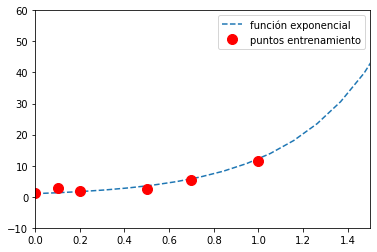

In [3]:
np.random.seed(999)

def f(x):
    return np.exp(2.5 * x)

x = np.linspace(0, 2, 20)
y = f(x)

# Añadimos ruido 'gausiano'
x_train = np.array([0, .1, .2, .5, .7, 1])
y_train = f(x_train) + 1 * np.random.randn(len(x_train))

plt.plot(x, y, '--')
plt.plot(x_train, y_train, 'or', ms=10)
plt.xlim(0, 1.5)
plt.ylim(-10, 60)
plt.legend(['función exponencial','puntos entrenamiento'])

## Regresión lineal

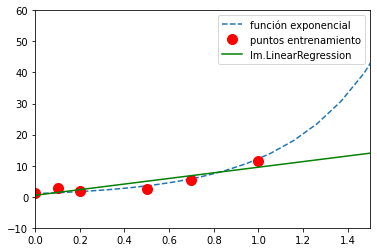

In [4]:
# Creamos el modelo
lr = lm.LinearRegression()
# Entrenamos el modelo en nuestro training dataset.
lr.fit(x_train[:, np.newaxis], y_train)
# Ahora, predecimos puntos con nuestro modelo entrenado:
y_lr = lr.predict(x[:, np.newaxis])

plt.plot(x, y, '--')
plt.plot(x_train, y_train, 'or', ms=10)
plt.plot(x, y_lr, 'g')
plt.xlim(0, 1.5)
plt.ylim(-10, 60)
plt.legend(['función exponencial','puntos entrenamiento','lm.LinearRegression'])

## Regresion Ridge con 4 grados

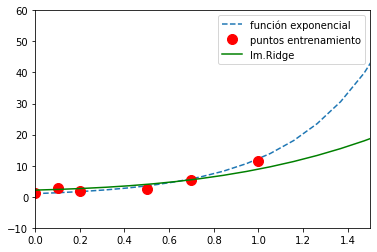

In [6]:
ridge = lm.Ridge()
plt.plot(x, y, '--')
plt.plot(x_train, y_train, 'or', ms=10)
deg=4
ridge.fit(np.vander(x_train, deg), y_train)
y_ridge = ridge.predict(np.vander(x, deg))
plt.plot(x, y_ridge, 'g')
plt.xlim(0, 1.5)
plt.ylim(-10, 60)
plt.legend(['función exponencial','puntos entrenamiento','lm.Ridge'])

## Polynomial regression

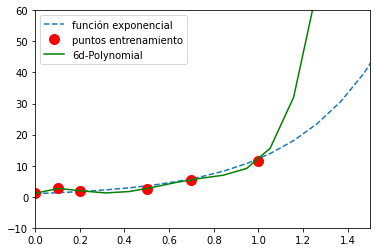

In [7]:
lrp = lm.LinearRegression()
plt.plot(x, y, '--')
plt.plot(x_train, y_train, 'or', ms=10)
deg=6
lrp.fit(np.vander(x_train, deg), y_train)
y_lrp = lrp.predict(np.vander(x, deg))
plt.plot(x, y_lrp, 'g')
plt.xlim(0, 1.5)
plt.ylim(-10, 60)
plt.legend(['función exponencial','puntos entrenamiento','6d-Polynomial'])